# PROBLEM STATEMENT

# This project includes appstore data analysis using Exploratory Data Analysis.


In [ ]:
# It predicts the highest rating of the aap based on the various information given by the data set using EDA.

In [1]:
import pandas as pd
import numpy as np

In [2]:
#open the csv file
df =pd.read_csv('appstore_games.csv')
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [3]:
#converting dates to object
import datetime

df['Original Release Date']=pd.to_datetime(df['Original Release Date'])
df['Current Version Release Date']=pd.to_datetime(df['Current Version Release Date'])
df['Update_gap']=(df['Current Version Release Date']-df['Original Release Date'])
#remove the rows that has user rating count less than 200 and last update is less than 6 months
Low_user_count=(df[df['User Rating Count']<200].index) & (df[df.Update_gap <datetime.timedelta(days=175)].index)
  
df.drop(Low_user_count,inplace=True)  

In [5]:
df=df.copy()
df['Genres']=df['Genres'].str.replace(',','').str.replace('Games','').str.replace('Entertainment','').str.replace('Strategy','')
df['Genres']=df['Genres'].str.split(' ').map(lambda x:' '.join(sorted(x)))
df['Genres']=df['Genres'].str.strip()
Non_main_genre=df[~df.Genres.str.contains('Puzzle') &\
                 ~df.Genres.str.contains('Family') &\
                 ~df.Genres.str.contains('Action') &\
                 ~df.Genres.str.contains('Education') &\
                 ~df.Genres.str.contains('Adventure') &\
                 ~df.Genres.str.contains('Board') &\
                 ~df.Genres.str.contains('Role') ].index
df.drop(Non_main_genre,inplace=True)
df.loc[df['Genres'].str.contains('Puzzle'),'Genres']='Puzzle'
df.loc[df['Genres'].str.contains('Board'),'Genres']='Puzzle'
df.loc[df['Genres'].str.contains('Action'),'Genres']='Action'
df.loc[df['Genres'].str.contains('Adventure'),'Genres']='Adventure'
df.loc[df['Genres'].str.contains('Role'),'Genres']='Adventure'
df.loc[df['Genres'].str.contains('Family'),'Genres']='Family'
df.loc[df['Genres'].str.contains('Education'),'Genres']='Family'

In [6]:
#remove all the rows that has no user rating
df = df.dropna(axis=0, subset=['Average User Rating'])
df.dropna(thresh=df.shape[0]*0.6,how='all',axis=0)
df.drop(['Subtitle'],axis=1,inplace=True)

#replace the null values in in-app purchase with 0
df['In-app Purchases']=df['In-app Purchases'].fillna(0)

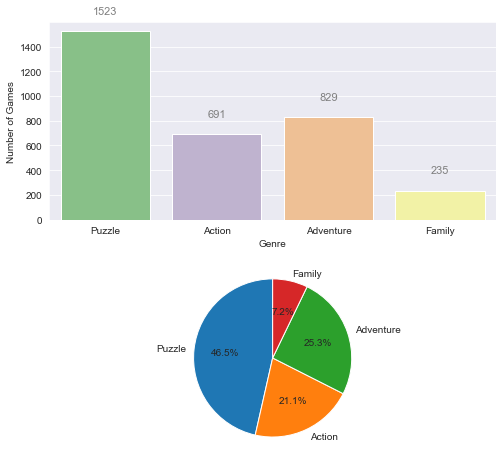

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
f, axes=plt.subplots(2,1,figsize=(8,8))

#Bar graph
x=['Puzzle','Action','Adventure','Family']
y=[df.Genres[(df['Genres']=='Puzzle')].count(),df.Genres[(df['Genres']=='Action')].count(),\
  df.Genres[(df['Genres']=='Adventure')].count(),df.Genres[(df['Genres']=='Family')].count()]

vis1=sns.barplot(x,y,palette='Accent',ax=axes[0])
vis1.set(xlabel='Genre',ylabel='Number of Games')
for p in vis1.patches:
    vis1.annotate("%.f"%p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),\
                 ha='center',va='center',fontsize=11,color='gray',xytext=(0,20),\
                 textcoords='offset points')
    
#Pie chart
NG=[df.Genres[(df['Genres']=='Puzzle')].count(),df.Genres[(df['Genres']=='Action')].count(),\
  df.Genres[(df['Genres']=='Adventure')].count(),df.Genres[(df['Genres']=='Family')].count()]
G=['Puzzle','Action','Adventure','Family']

plt.pie(NG,labels=G,startangle=90,autopct='%.1f%%')
plt.show()
plt.ioff()

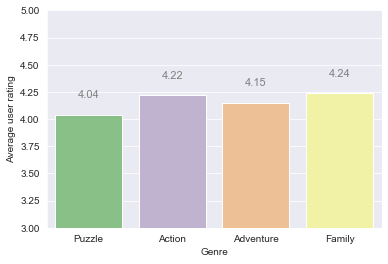

In [8]:
#sns.set_style('darkgrid')

x=['Puzzle','Action','Adventure','Family']
y=[df['Average User Rating'][(df.Genres=='Puzzle')].mean(),\
   df['Average User Rating'][(df.Genres=='Action')].mean(),\
   df['Average User Rating'][(df.Genres=='Adventure')].mean(),\
   df['Average User Rating'][(df.Genres=='Family')].mean()]

vis1=sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Average user rating')
vis1.set(ylim=(3,5))
for p in vis1.patches:
    vis1.annotate("%.2f"%p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),\
                 ha='center',va='center',fontsize=11,color='gray',xytext=(0,20),\
                 textcoords='offset points') 
    
plt.ioff()    

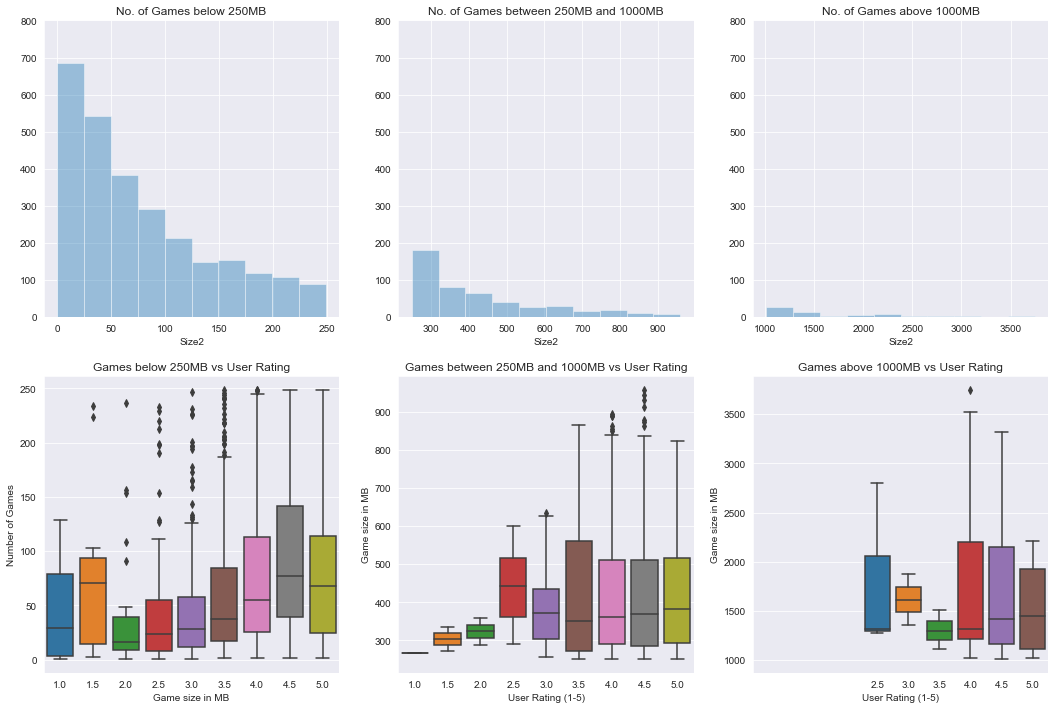

In [9]:
df['Size2']=round(df['Size']/1000000,1)
Size_less_250MB=df[df.Size2<250]
Size_less_1000MB=df[(df.Size2>=250)&(df.Size2<1000)]
Size_more_1000MB=df[df.Size2>=1000]

sns.set_style('darkgrid')
f, axes=plt.subplots(2,3,figsize=(18,12))

vis1=sns.boxplot(data=Size_less_250MB,x='Average User Rating',y='Size2',ax=axes[1,0])
vis2=sns.boxplot(data=Size_less_1000MB,x='Average User Rating',y='Size2',ax=axes[1,1])
vis3=sns.boxplot(data=Size_more_1000MB,x='Average User Rating',y='Size2',ax=axes[1,2],)
vis4=sns.distplot(Size_less_250MB.Size2,bins=10,kde=False,ax=axes[0,0])
vis5=sns.distplot(Size_less_1000MB.Size2,bins=10,kde=False,ax=axes[0,1])
vis6=sns.distplot(Size_more_1000MB.Size2,bins=10,kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game size in MB')
vis1.set(xlabel='Game size in MB',ylabel='Number of Games')
vis1.set(xlabel='Game size in MB',ylabel='Number of Games')
vis1.set(xlabel='Game size in MB',ylabel='Number of Games')

axes[0,0].set_title('No. of Games below 250MB')
axes[0,1].set_title('No. of Games between 250MB and 1000MB')
axes[0,2].set_title('No. of Games above 1000MB')
axes[1,0].set_title('Games below 250MB vs User Rating')
axes[1,1].set_title('Games between 250MB and 1000MB vs User Rating')
axes[1,2].set_title('Games above 1000MB vs User Rating')
vis3.set(xlim=(-4,5.5))

vis4.set(ylim=(0,800))
vis5.set(ylim=(0,800))
vis6.set(ylim=(0,800))

plt.ioff()

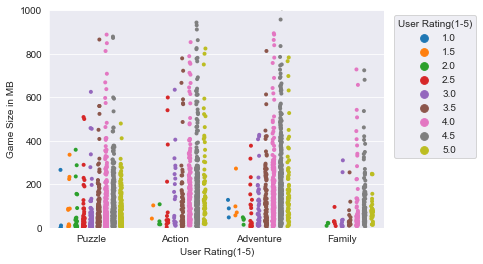

In [10]:
vis1=sns.stripplot(y='Size2',x='Genres',data=df,hue='Average User Rating',dodge=True,size=4)
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29,1))

vis1.set(ylim=(0,1000))
vis1.set(xlabel='User Rating(1-5)',ylabel='Game Size in MB')
plt.ioff()

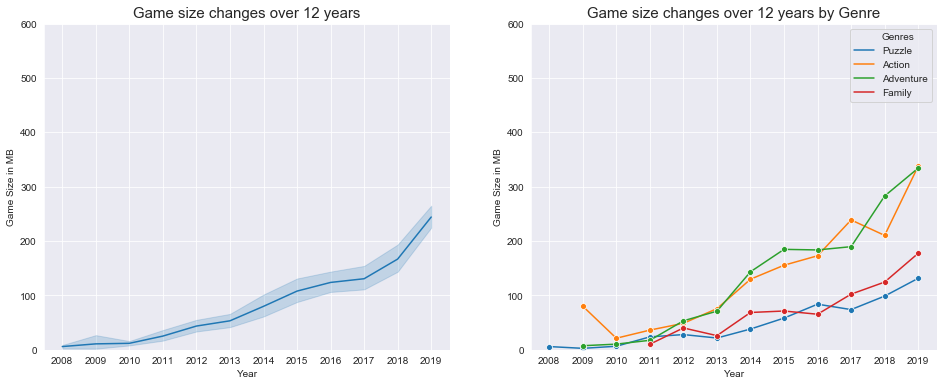

In [11]:
df['Year']=df['Current Version Release Date']
df['Year']=df['Year'].astype(str)

for i in (list(df.index.values)):
    df['Year'][i]=df['Year'][i][:4]

g,axes =plt.subplots(1,2,figsize=(16,6))

vis1=sns.lineplot(x=df.Year,y=df.Size2,data=df,ax=axes[0])
vis1.set(ylim=(0,600))
vis2=sns.lineplot(x=df.Year,y=df.Size2,hue=df.Genres,err_style=None,marker='o',ax=axes[1])
vis2.set(ylim=(0,600))
plt.legend(bbox_to_anchor=(1,1))

axes[0].set_title('Game size changes over 12 years',fontsize=15)
axes[1].set_title('Game size changes over 12 years by Genre',fontsize=15)

vis1.set(xlabel='Year',ylabel='Game Size in MB')
vis2.set(xlabel='Year',ylabel='Game Size in MB')

plt.ioff()

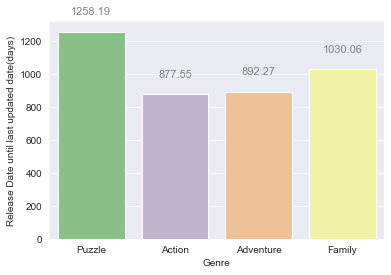

In [12]:
for i in (list(df.index.values)):
    df.Update_gap[i]=df.Update_gap[i].days
x=['Puzzle','Action','Adventure','Family']
y=[df.Update_gap[(df.Genres=='Puzzle')].mean(),\
  df.Update_gap[(df.Genres=='Action')].mean(),\
  df.Update_gap[(df.Genres=='Adventure')].mean(),\
  df.Update_gap[(df.Genres=='Family')].mean()]

vis1=sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Release Date until last updated date(days)')

for p in vis1.patches:
    vis1.annotate("%.2f"%p.get_height(),(p.get_x()+p.get_width()/2.,p.get_height()),\
                 ha='center',va='center',fontsize=11,color='gray',xytext=(0,20),\
                 textcoords='offset points')  

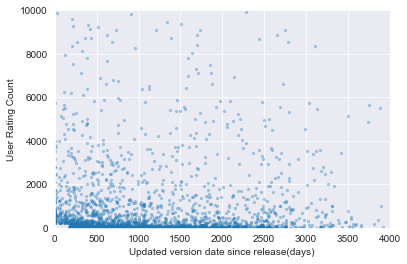

In [13]:
plt.scatter(df.Update_gap,df['User Rating Count'],alpha=0.3,s=5)

plt.xlim(0,4000)
plt.ylim(0,10000)

plt.xlabel('Updated version date since release(days)')
plt.ylabel('User Rating Count')

plt.show()

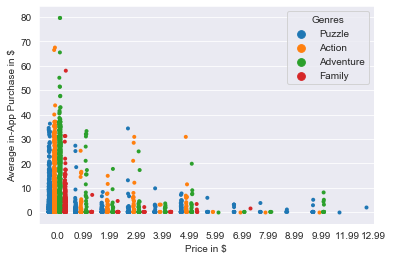

In [14]:
df2=df.copy()
import statistics
df2['In-app Purchases']=df2['In-app Purchases'].str.replace(',','')
df2['In-app Purchases']=df2['In-app Purchases'].fillna(0)

for i in (list(df2.index.values)):
    if df2['In-app Purchases'][i]==0:
        df2['In-app Purchases'][i]==0.01
    elif df2['In-app Purchases'][i]!=0:
        a=str.split(df2['In-app Purchases'][i])
        a=[float(i) for i in a]
        df2['In-app Purchases'][i]=statistics.mean(a)
vis1=sns.stripplot(y=df2['In-app Purchases'],x=df2.Price,data=df2,hue=df2.Genres,dodge=True,size=4)

vis1.set(xlabel='Price in $',ylabel='Average in-App Purchase in $')
vis1.set(xlim=(-0.7,12))
plt.ioff()

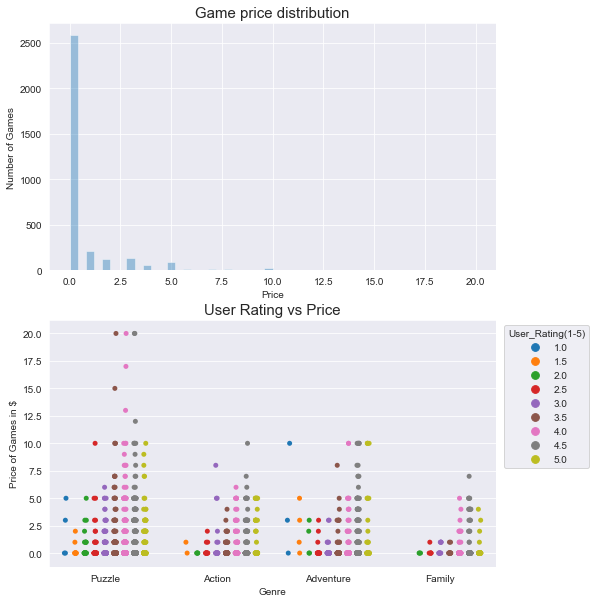

In [15]:
h,axes=plt.subplots(2,1,figsize=(8,10))

vis1=sns.distplot(df.Price,kde=None,ax=axes[0])
vis2=sns.stripplot(y=df.Price,x=df.Genres,data=df,ax=axes[1],hue=df['Average User Rating'],dodge=1)

vis1.set(xlabel='Price',ylabel='Number of Games')
vis2.set(xlabel='Genre',ylabel='Price of Games in $')

axes[0].set_title('Game price distribution',fontsize=15)
axes[1].set_title('User Rating vs Price',fontsize=15)
plt.legend(title='User_Rating(1-5)',bbox_to_anchor=(1.22,1))

plt.ioff()

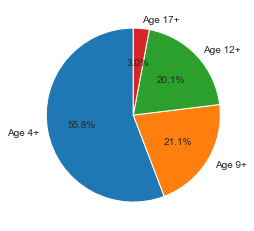

In [16]:
NAR=[df2['Age Rating'][(df2['Age Rating']=='4+')].count(),df2['Age Rating'][(df2['Age Rating']=='9+')].count(),\
    df2['Age Rating'][(df2['Age Rating']=='12+')].count(),df2['Age Rating'][(df2['Age Rating']=='17+')].count()]
AR=['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(NAR,labels=AR,startangle=90,autopct='%.1f%%')
plt.show()

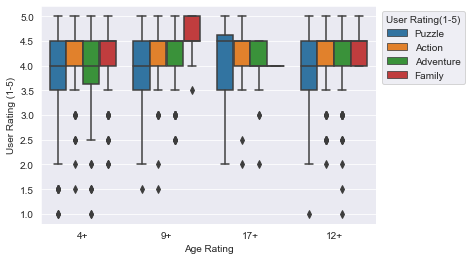

In [17]:
vis1=sns.boxplot(x=df2['Age Rating'],y=df['Average User Rating'],data=df,hue=df.Genres,dodge=True)

vis1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.28,1))
plt.ioff()